In [2]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [3]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [15]:
# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [2]
activations = ['softmax'] 

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, 
                            layer_output_sizes, 
                            activations, 
                            epsilon=0.1,
                            llambda=0.1,
                            batch_size=100, 
                            epochs=100, 
                            loss_fn='cross_entropy'))
])

# getting data for confusion matrix
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_test)

print(pipeline.predict(X_train))

# Evauluate the model
accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy: {accuracy:.4f}')

accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.6571428571428571
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 1 1]
Train accuracy: 0.9780
Test accuracy:

It seems to work very well with softmax, though this is not the canonical choice for binary classification. Still, it gives the best results, converging to about 97% accuracy in less than 100 epochs. Note for the report: Single layer NN is mathematically equiv to regression.

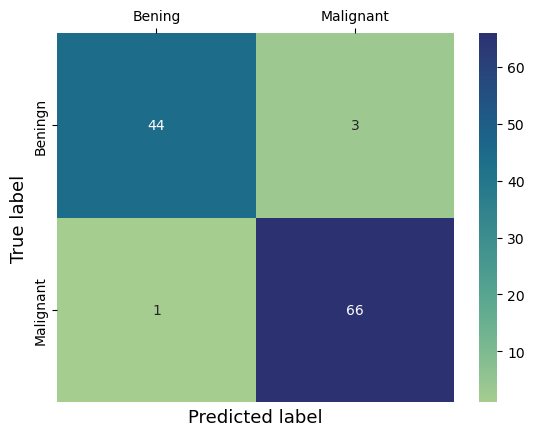

In [16]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'],
            cmap='crest')
plt.ylabel('True label', fontsize=13)
#plt.title('Logistic regression', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.xlabel('Predicted label', fontsize=13)
plt.show()


In [5]:
# Grid search for learning rate and regularization
k_folds = KFold(n_splits=5)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=500))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=3,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Epoch 0: Accuracy = 0.6208791208791209
Epoch 100: Accuracy = 0.42032967032967034
Epoch 200: Accuracy = 0.6456043956043956
Epoch 300: Accuracy = 0.7747252747252747
Epoch 400: Accuracy = 0.8186813186813187
[CV 1/5] END model__epsilon=0.0001, model__llambda=0;, score=0.846 total time=   7.2s
Epoch 0: Accuracy = 0.6813186813186813
Epoch 100: Accuracy = 0.7692307692307693
Epoch 200: Accuracy = 0.8214285714285714
Epoch 300: Accuracy = 0.8571428571428571
Epoch 400: Accuracy = 0.8763736263736264
[CV 2/5] END model__epsilon=0.0001, model__llambda=0;, score=0.868 total time=   7.1s
Epoch 0: Accuracy = 0.5164835164835165
Epoch 100: Accuracy = 0.8708791208791209
Epoch 200: Accuracy = 0.8818681318681318
Epoch 300: Accuracy = 0.8901098901098901
Epoch 400: Accuracy = 0.8983516483516484
[CV 3/5] END model__epsilon=0.0001, model__llambda=0;, score=0.879 total time=   7.4s
Epoch 0: Accuracy = 0.6401098901098901
Epoch 100: Accuracy = 0.2912087

In [19]:
best_model = grid_search.best_estimator_
best_model.score(X_test, y_test)

0.956140350877193

## Comparing with Scikit-learn:

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(solver='lbfgs'))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9649122807017544

Our best model does very similarily (though slightly worse) at 96%.

### Compare grid search results with nn-results. See link in project description for report insp.

In [31]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, epsilon=0.01, epochs=50, random_state=1):
        self.epsilon = epsilon
        self.epochs = epochs
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        self.w = np.random.randn(X.shape[1])
        self.b = np.random.randn(1)

        for i in range(self.epochs):
            predictions = self.forwardpropagation(X)
            output = self.sigmoid(predictions)
            errors = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.w += self.epsilon * errors#X.T.dot(errors) / X.shape[0]
            self.b += self.epsilon * errors
            #loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
        return self

    def forwardpropagation(self, X):
        """Calculate net input"""
        return np.dot(X, self.w) + self.b

    def sigmoid(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.sigmoid(self.forwardpropagation(X)) >= 0.5, 1, 0)

In [32]:
lrgd = LogisticRegressionGD(epsilon=0.3, epochs=1000, random_state=1)
lrgd.fit(X_train,
         y_train)

print(lrgd.predict(X_test))

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


C:\Users\maria\AppData\Local\Temp\ipykernel_24128\3915260783.py:52: RuntimeWarning: divide by zero encountered in log
  errors = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]


In [ ]:
class LogisticRegressionSGD:
    def __init__(self, epsilon=0.01, epochs=50, random_state=1):
        self.epsilon = epsilon
        self.epochs = epochs
        self.random_state = random_state

    def logistic_predictions(self, weights, inputs):
        # Outputs probability of a label being true according to logistic model.
        return sigmoid(np.dot(inputs, weights))
    
    def training_loss(self, weights):
        # Training loss is the negative log-likelihood of the training labels.
        preds = self.logistic_predictions(weights, inputs)
        label_probabilities = preds * targets + (1 - preds) * (1 - targets)
        return -np.sum(np.log(label_probabilities))
    
    training_gradient_fun = grad(training_loss)

    def fit(self, X, y):
        self.w = np.random.randn(X.shape[0])

        for i in range(100):
            self.w -= training_gradient_fun(weights) * 0.01

def sigmoid(z):
    """Compute logistic sigmoid activation"""
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))


# Define a function that returns gradients of training loss using Autograd.


# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))


print("Trained loss:", training_loss(weights))